# PETOOL wrapper for Python 3

## Installation

1. PETOOL Wrapper needs MATLAB Engine API for Python. See https://www.mathworks.com/help/matlab/matlab-engine-for-python.html for installation instructions.
2. Download PETOOL sources from http://www.sciencedirect.com/science/article/pii/S0010465511002669.
3. Add PETOOL sources to MATLABPATH environmant variable. One can do it by running the following commands in matlab console  
    `addpath('c\path_to_petool')`  
    `savepath`

## Usage

In [11]:
%matplotlib inline
from rwp.petool import PETOOLPropagator
from rwp.WPVis import *

Create new environment

In [2]:
env = EMEnvironment()
env.z_max = 300
env.N_profile = lambda x, z: z / 6371000 * 1e6
env.lower_boundary = EarthSurfaceBC(wavelength=0.1, conductivity=17.03, permittivity=53.44, polarz='H')
env.upper_boundary = EarthAtmosphereBC()
max_range = 50000

In [3]:
petool = PETOOLPropagator(env, wavelength=0.1, dx_wl=200, dz_wl=5)
antenna = GaussSource(k0=petool.k0, height=30, beam_width=2, eval_angle=0, polarz='H')
petool_field = petool.propagate(max_range, antenna)

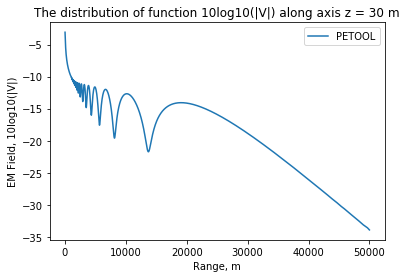

In [16]:
petool_vis = FieldVisualiser(petool_field, trans_func=lambda x: x, label='PETOOL')
plt = petool_vis.plot_hor(30)
plt.xlabel('Range, m')
plt.ylabel('EM Field, 10log10(|V|)')
plt.title('The distribution of function 10log10(|V|) along axis z = 30 m')
plt.show()

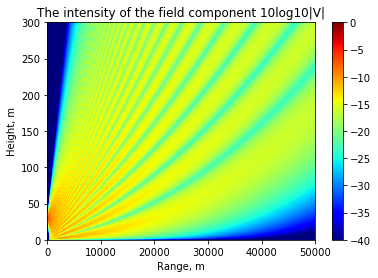

In [17]:
plt = petool_vis.plot2d(min=-40, max=0)
plt.xlabel('Range, m')
plt.ylabel('Height, m')
plt.title('The intensity of the field component 10log10|V|')